CAS - POURRIELS

Accuracy score : Arbe de décision max_depth = None
0.9163636363636364
F1 score : Arbe de décision max_depth = None
0.8947820168661601


Accuracy score : Arbe de décision max_depth = 3
0.9127272727272727
F1 score : Arbe de décision max_depth = 3
0.8669265128801322


Accuracy score : Arbe de décision max_depth = 5
0.9345454545454546
F1 score : Arbe de décision max_depth = 5
0.8899805293455758


Accuracy score : Arbe de décision max_depth = 10
0.92
F1 score : Arbe de décision max_depth = 10
0.8852019199339763




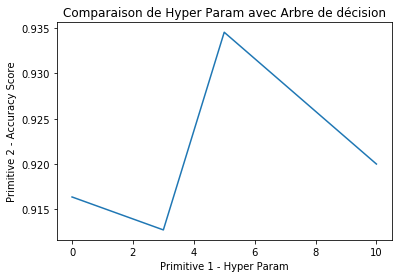

CAS - GALAXIES

Accuracy score : Arbe de décision max_depth = None
0.92
F1 score : Arbe de décision max_depth = None
0.9163020711338178




C:\Users\turco\Anaconda3\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy score : Arbe de décision max_depth = 3
0.8668656716417911
F1 score : Arbe de décision max_depth = 3
0.8693671087621995


Accuracy score : Arbe de décision max_depth = 5
0.9014925373134328
F1 score : Arbe de décision max_depth = 5
0.902685541977613


Accuracy score : Arbe de décision max_depth = 10
0.9283582089552239
F1 score : Arbe de décision max_depth = 10
0.9265705051628438




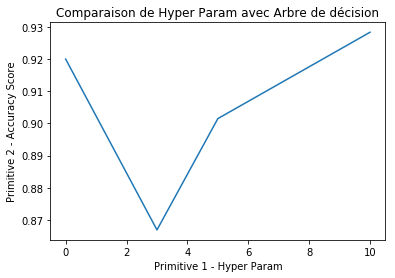

CAS - POURRIELS - KNN

Accuracy score : Algorithme KNN avec valeur de K = 3
0.7236363636363636
F1 score : Algorithme KNN avec valeur de K = 3
0.7211260336281038


Accuracy score : Algorithme KNN avec valeur de K = 5
0.7563636363636363
F1 score : Algorithme KNN avec valeur de K = 5
0.7375361129945541


Accuracy score : Algorithme KNN avec valeur de K = 10
0.7381818181818182
F1 score : Algorithme KNN avec valeur de K = 10
0.6996503561023821




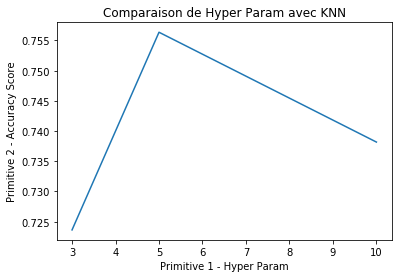

CAS - GALAXIES - KNN

Accuracy score : Algorithme KNN avec valeur de K = 3
0.591044776119403
F1 score : Algorithme KNN avec valeur de K = 3
0.5833707351163354


Accuracy score : Algorithme KNN avec valeur de K = 5
0.5773134328358209
F1 score : Algorithme KNN avec valeur de K = 5
0.5855844839820993


Accuracy score : Algorithme KNN avec valeur de K = 10
0.5534328358208955
F1 score : Algorithme KNN avec valeur de K = 10
0.5910459467214354




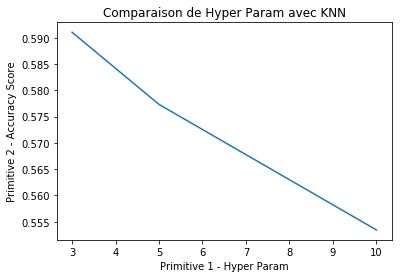

CAS - POURRIELS - BAYES

Accuracy score : Bayes naïf
0.8036363636363636
F1 score : Bayes naïf
0.8371048453468991


CAS - GALAXIES - BAYES

Accuracy score : Bayes naïf
0.724776119402985
F1 score : Bayes naïf
0.7290027735240435



----VALIDATION CROISÉE-----


CAS - POURRIELS - Arbre


C:\Users\turco\Anaconda3\envs\gti770\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\turco\Anaconda3\envs\gti770\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Cross-Val Accuracy: 
0.8934782608695654
Cross-Val F1: 
0.9287275742378996

CAS - GALAXIES - Arbre
Cross-Val Accuracy: 
0.9127055871845027
Cross-Val F1: 
0.9445642007811262

CAS - POURRIELS - KNN
Cross-Val Accuracy: 
0.8037842190016103
Cross-Val F1: 
0.8032097781737273

CAS - GALAXIES - KNN
Cross-Val Accuracy: 
0.6516967840705442
Cross-Val F1: 
0.6515349498221176

CAS - POURRIELS - BAYES
Cross-Val Accuracy: 
0.8036363636363635
Cross-Val F1: 
0.837104845346899

CAS - GALAXIES - BAYES
Cross-Val Accuracy: 
0.7247761194029849
Cross-Val F1: 
0.7290027735240435


In [2]:
#------------------------------------------
# Lab 2 - GTI770
#------------------------------------------


# Import des libraries necessaires
from skimage import io, novice
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

#http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets

#http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split, KFold

import numpy as np
#import cv2
import operator 

#https://docs.python.org/2/library/csv.html
import csv

%matplotlib inline


#http://scikit-learn.org/stable/modules/neighbors.html
from sklearn.neighbors import NearestNeighbors


#--------------------------------------------------------------------------------------------------------
#
# -------------------------------------MAIN PROGRAM------------------------------------------------------

# Retrieve column from matrix
def column(matrix, i):
    return [row[i] for row in matrix]

# On a besoin de cette fonction car la conversion de nparray laisse toutes les données en np_str et on veux float
def convertStringsToFloats(array):
    convertedArray = []
    for element in array:
        convertedArray.append(float(element))
    return convertedArray

#Séparation des données en test/train
def floatMapTrainValidTest(data, labels):

    trainFeatures, validFeatures, trainLabels, validLabels = train_test_split(data, labels, test_size=0.30)
    validFeatures, testFeatures, validLabels, testLabels = train_test_split(validFeatures, validLabels, test_size=0.33)
    
    floatDataMap = {"trainFeatures" : [], 
                   "trainLabels" : [], 
                   "validFeatures" : [],
                   "validLabels" : [],
                   "testFeatures" : [], 
                   "testLabels" : []
                   }
    
    for row in trainFeatures:
        floatDataMap["trainFeatures"].append(convertStringsToFloats(row))
        
    for row in validFeatures:
        floatDataMap["validFeatures"].append(convertStringsToFloats(row))
        
    for row in testFeatures:
        floatDataMap["testFeatures"].append(convertStringsToFloats(row))
        
    for row in trainLabels:
        floatDataMap["trainLabels"].append(row)
        
    for row in validLabels:
        floatDataMap["validLabels"].append(row)
        
    for row in testLabels:
        floatDataMap["testLabels"].append(row)
        
    return floatDataMap

#
#
#
#
#------------------Section Définition de fonctions-----------
#
#
#
#

#Conversion des labels de validation de format bizarres
def arrangeLabels(labels):
    newLabels = []
    for label in labels:
        newLabels.append(label[0])
    return newLabels

#On utilise ici 4 hyper paramètres pour la validation de nos résultats
def decisionClassifyWithTree(trainLabels, trainFeatures, validationLabels, validationFeatures, testLabels, testFeatures, case):

    #Paramètres du decision tree
    decisionTreeParams = [0, 3, 5, 10]
    accuracyScoreList = []
    print(case)
    print()

    # Creation de nos arbres de decision en utilisant l'entropie et un max_depth variable
    for element in decisionTreeParams:
        if element == 0:
            desTree = tree.DecisionTreeClassifier(criterion='entropy')
            element = "None"
        else:
            desTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=element)

        # Apprentissage avec la fonction fit
        desTree = desTree.fit(trainFeatures, trainLabels)       
        
        predictionLabels = desTree.predict(validationFeatures)
        
        # Accuracy Score
        print("Accuracy score : Arbe de décision max_depth = " + str(element))
        print(desTree.score(testFeatures, testLabels))
        accuracyScoreList.append(desTree.score(testFeatures, testLabels))
        
        if (isinstance(validationLabels[0], str) == False):
            validationLabels = arrangeLabels(validationLabels)
            
        if (isinstance(predictionLabels[0], str) == False):
            predictionLabels = arrangeLabels(predictionLabels)
        
        print("F1 score : Arbe de décision max_depth = " + str(element))
        print(f1_score(validationLabels, predictionLabels, average='weighted'))
        print('\n')
        
    #Accuracy Graphique
    x = decisionTreeParams
    y = accuracyScoreList

    plt.plot(x, y)

    plt.title('Comparaison de Hyper Param avec Arbre de décision')
    plt.xlabel('Primitive 1 - Hyper Param')
    plt.ylabel('Primitive 2 - Accuracy Score')
    plt.show()

     
def crossValidationTree(trainLabels, trainFeatures, validationLabels, validationFeatures, testLabels, testFeatures, case):
    
    print()
    print(case)
    
    dataFeatures = trainFeatures + validationFeatures + testFeatures
    dataLabels = trainLabels + validationLabels + testLabels
    
    accuracyScoreList = []
    f1ScoreList = []
    
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(dataFeatures):
        
        
        newTrainFeatures = []
        newTrainLabels = []
        newTestFeatures = []
        newTestLabels = []
        
        
        for index in train_index:
            newTrainFeatures.append(dataFeatures[index])
            newTrainLabels.append(dataLabels[index])
            
        for index in test_index:
            newTestFeatures.append(dataFeatures[index])
            newTestLabels.append(dataLabels[index])
        
        desTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

        # Apprentissage avec la fonction fit
        desTree = desTree.fit(newTrainFeatures, newTrainLabels)
        predictionLabels = desTree.predict(newTestFeatures)

        # Accuracy Score
        accuracyScoreList.append(desTree.score(newTestFeatures, newTestLabels))

        if (isinstance(validationLabels[0], str) == False):
            validationLabels = arrangeLabels(validationLabels)

        if (isinstance(predictionLabels[0], str) == False):
            predictionLabels = arrangeLabels(predictionLabels)

        #f1 score
        f1ScoreList.append(f1_score(newTestLabels, predictionLabels, average='weighted'))
    
    print("Cross-Val Accuracy: ")   
    print(np.mean(accuracyScoreList))
    print("Cross-Val F1: ")
    print(np.mean(f1ScoreList))
    
    
#KNN        
def DecisionWithKNN(trainLabels, trainFeatures, validationLabels, validationFeatures, testLabels, testFeatures, case):
    
    #Paramètres du KNN
    knnParams = [3,5,10]
    accuracyScoreList = []    
    print(case)
    print()

    for element in knnParams:
        predictionLabels=[]
        correct = 0
        nbrs = NearestNeighbors(n_neighbors=element, algorithm='ball_tree').fit(testFeatures)
        distances, indices = nbrs.kneighbors(testFeatures)
        
        for x in range(len(indices)): 
            classVotes = {}
            
            for y in range(len(indices[x])):
                if (y != 0):
                    neightborsClass = indices[x][y]
                    
                    neightborsClass =  testLabels[neightborsClass][0]
                    
                    if neightborsClass in classVotes:
                        classVotes[neightborsClass] += 1
                    else:
                        classVotes[neightborsClass] = 1
                sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)      
            if (sortedVotes[0][0] == testLabels[x][0]):
                correct += 1  
            
        print("Accuracy score : Algorithme KNN avec valeur de K = " + str(element))
        print(float(correct)/float(len(indices)))
        accuracyScoreList.append(float(correct)/float(len(indices)))
        
        nbrs = NearestNeighbors(n_neighbors=element, algorithm='ball_tree').fit(validationFeatures)
        distances, indices = nbrs.kneighbors(validationFeatures)
        
        for x in range(len(indices)): 
            classVotes = {}
            
            for y in range(len(indices[x])):
                if (y != 0):
                    neightborsClass = indices[x][y]
                    
                    neightborsClass =  validationLabels[neightborsClass][0]
                    
                    if neightborsClass in classVotes:
                        classVotes[neightborsClass] += 1
                    else:
                        classVotes[neightborsClass] = 1
                sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
            predictionLabels.append(sortedVotes[0][0])
        
        print("F1 score : Algorithme KNN avec valeur de K = " + str(element))
        print(f1_score(validationLabels, predictionLabels, average='weighted'))
        print('\n')
        
    #Accuracy Graphique
    x = knnParams
    y = accuracyScoreList

    plt.plot(x, y)

    plt.title('Comparaison de Hyper Param avec KNN')
    plt.xlabel('Primitive 1 - Hyper Param')
    plt.ylabel('Primitive 2 - Accuracy Score')
    plt.show()

def crossValidationKNN(trainLabels, trainFeatures, validationLabels, validationFeatures, testLabels, testFeatures, weight, case):
    
    print()
    print(case)
    
    dataFeatures = trainFeatures + validationFeatures + testFeatures
    dataLabels = trainLabels + validationLabels + testLabels
    
    accuracyScoreList = []
    f1ScoreList = []
    
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(dataFeatures):
        
        newTrainFeatures = []
        newTrainLabels = []
        newTestFeatures = []
        newTestLabels = []
        
        for index in train_index:
            newTrainFeatures.append(dataFeatures[index])
            newTrainLabels.append(dataLabels[index])
            
        for index in test_index:
            newTestFeatures.append(dataFeatures[index])
            newTestLabels.append(dataLabels[index])
        
        predictionLabels=[]
        correct = 0
        nbrs = NearestNeighbors(n_neighbors=weight, algorithm='ball_tree').fit(newTrainFeatures)
        distances, indices = nbrs.kneighbors(newTrainFeatures)

        for x in range(len(indices)): 
            classVotes = {}

            for y in range(len(indices[x])):
                if (y != 0):
                    neightborsClass = indices[x][y]

                    neightborsClass =  newTrainLabels[neightborsClass][0]

                    if neightborsClass in classVotes:
                        classVotes[neightborsClass] += 1
                    else:
                        classVotes[neightborsClass] = 1
                sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)      
            if (sortedVotes[0][0] == newTrainLabels[x][0]):
                correct += 1  

        accuracyScoreList.append(float(correct)/float(len(indices)))

        nbrs = NearestNeighbors(n_neighbors=weight, algorithm='ball_tree').fit(newTrainFeatures)
        distances, indices = nbrs.kneighbors(newTrainFeatures)

        for x in range(len(indices)): 
            classVotes = {}

            for y in range(len(indices[x])):
                if (y != 0):
                    neightborsClass = indices[x][y]

                    neightborsClass =  newTrainLabels[neightborsClass][0]

                    if neightborsClass in classVotes:
                        classVotes[neightborsClass] += 1
                    else:
                        classVotes[neightborsClass] = 1
                sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
            predictionLabels.append(sortedVotes[0][0])

        f1ScoreList.append(f1_score(newTrainLabels, predictionLabels, average='weighted'))
    
    print("Cross-Val Accuracy: ")   
    print(np.mean(accuracyScoreList))
    print("Cross-Val F1: ")
    print(np.mean(f1ScoreList))
    
    
#Bayes
def decisionClassifyBayes(trainLabels, trainFeatures, validationLabels, validationFeatures, testLabels, testFeatures, case):       

    print(case)
    print()
    
    predictionLabels = []
    
    bayes = GaussianNB()
    desBayes = bayes.fit(trainFeatures, trainLabels) 
    predictionLabels = desBayes.predict(validationFeatures)
    
    # Accuracy Score
    print("Accuracy score : Bayes naïf")
    print(desBayes.score(testFeatures, testLabels))
        
    if (isinstance(validationLabels[0], str) == False):
        validationLabels = arrangeLabels(validationLabels)
            
    if (isinstance(predictionLabels[0], str) == False):
        predictionLabels = arrangeLabels(predictionLabels)
        
    print("F1 score : Bayes naïf")
    print(f1_score(validationLabels, predictionLabels, average='weighted'))
    print('\n')
        
def crossValidationBayes(trainLabels, trainFeatures, validationLabels, validationFeatures, testLabels, testFeatures, case):
    
    dataFeatures = trainFeatures + validationFeatures + testFeatures
    dataLabels = trainLabels + validationLabels + testLabels
    
    accuracyScoreList = []
    f1ScoreList = []
    
    print()
    print(case)
    
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(dataFeatures):
        
        
        newTrainFeatures = []
        newTrainLabels = []
        newTestFeatures = []
        newTestLabels = []
        
        for index in train_index:
            newTrainFeatures.append(dataFeatures[index])
            newTrainLabels.append(dataLabels[index])
            
        for index in test_index:
            newTestFeatures.append(dataFeatures[index])
            newTestLabels.append(dataLabels[index])
        
        predictionLabels = []

        bayes = GaussianNB()
        desBayes = bayes.fit(trainFeatures, trainLabels) 
        predictionLabels = desBayes.predict(validationFeatures)

        # Accuracy Score
        accuracyScoreList.append(desBayes.score(testFeatures, testLabels))

        if (isinstance(validationLabels[0], str) == False):
            validationLabels = arrangeLabels(validationLabels)

        if (isinstance(predictionLabels[0], str) == False):
            predictionLabels = arrangeLabels(predictionLabels)

        f1ScoreList.append(f1_score(validationLabels, predictionLabels, average='weighted'))

    print("Cross-Val Accuracy: ")   
    print(np.mean(accuracyScoreList))
    print("Cross-Val F1: ")
    print(np.mean(f1ScoreList))
        
# À modifier pour votre environmement - Galaxy
#galaxyLabelFolderLocation = 'C:/Users/AP76270/Desktop/galaxy/'
#galaxyImagesFolderLocation = 'C:/Users/AP76270/Desktop/images/'
galaxyFeatureVectorFolderLocation = 'C:/Users/turco/gti770/'

# À modifier pour votre environmement - Email
emailFeatureVectorFolderLocation = 'C:/Users/turco/gti770/'

# Lecture de fichier
# galaxyLabelsFid = open(galaxyLabelFolderLocation + 'galaxy_label_data_set.csv', 'r') # option r veut dire read
# galaxyLabelsTxt = galaxyLabelsFid.readlines() # Cette ligne permet de lire tout le fichier 
# galaxyLabelsTxt = galaxyLabelsTxt[1:] # Skip for header
# galaxyLabelsFid.close() # Fermeture de fichier

# featureVectorFid = open(galaxyFeatureVectorFolderLocation + 'galaxy_feature_vectors.csv', 'r') 
# featureVectorTxt = featureVectorFid.readlines() 
# featureVectorFid.close() 

emailVectorFid = open(emailFeatureVectorFolderLocation + 'spam.csv', 'r')
emailVectorTxt = emailVectorFid.readlines()
emailVectorFid.close()

# Lecture de fichier -> Utiliser après l'extraction des données du TP01
# Ici on a besoin du CSV 
galaxyVectorFid = open(galaxyFeatureVectorFolderLocation + 'features.csv', 'r') # option r veut dire read
galaxyVectorTxt = galaxyVectorFid.readlines() # Cette ligne permet de lire tout le fichier 
galaxyVectorFid.close() 

# featureVectorMap = {}

# # Chargement des donnees remplace iris.data avec nos primitives et replace iris.target avec nos étiquettes
# iris = load_iris()

# for line in featureVectorTxt:
#     columns = line.split(',')
#     featureVectorMap.update({float(columns[0]): columns[1:-1]})

galaxyFeatureVector=[]
emailFeatureVector=[]
    
#
#
#
#
#------------------Section Extraction de primitives non-CSV (Galaxie)-----------
#
#
#
#
    
# # Zoom to modify for precision
# zoom1=60
# zoom2=30
# zoom3=100

# # Limite pour les tests - à modifier
# # limit = 100

# for element in galaxyLabelsTxt:
#     #if (limit <= 0):
#         #break
    
#     element = element[:-1]
#     element = element.split(',')
#     img1 = novice.open(galaxyImagesFolderLocation + element[0] +'.jpg') #Chemin a votre image de galaxie

#     #Croping     
#     y=img1.width
#     x=img1.height
#     startx1 = y//2-(zoom1//2)
#     starty1 = x//2-(zoom1//2)    
#     startx2 = y//2-(zoom2//2)
#     starty2 = x//2-(zoom2//2)
#     startx3 = y//2-(zoom3//2)
#     starty3 = x//2-(zoom3//2)
#     img21=(img1[starty1:starty1+zoom1,startx1:startx1+zoom1])
#     img22=(img1[starty2:starty2+zoom2,startx2:startx2+zoom2])
#     img23=(img1[starty3:starty3+zoom3,startx3:startx3+zoom3])
    
#     redCount = 0
#     blueCount = 0
    
#     #For Color Ratio  # DOESN'T WORK -> divides by zero if you use a ratio
#     for pixel in img21:
#         if (pixel.red > pixel.blue):
#             redCount = redCount + 1
#         else:
#             blueCount = blueCount + 1
    
#     #For Black and White ratio
#     img3 = img22.rgb
#     img4 = Image.fromarray(img3)
#     img5 = img4.convert('1')
#     img6 = np.array(img5)
#     img7 = np.unique(img6,return_counts=True)
#     img8 = img7[1]

#     #Number of pixels
#     blackCount = img8[0]
#     whiteCount = img8[1]
    
#     #Circular
#     img9 = img23.rgb
#     img10 = Image.fromarray(img9)
#     img11 = np.array(img10)
#     img12 = img11[:, :, ::-1].copy() 
#     img13 = cv2.cvtColor(img12,cv2.COLOR_BGR2GRAY)

#     all_circs = cv2.HoughCircles(img13, cv2.HOUGH_GRADIENT, 0.9,200,param1=50,param2=30,minRadius=30,maxRadius=100)
#     circular = 0
    
#     if isinstance(all_circs,np.ndarray):
#         circular=1
#     else:
#         circular=0
    
#     ratio=(blackCount/whiteCount)
    
#     # On peut essayer de normalizer nos données avec un z-score s'ils donnent des valeurs vraiment folles
#     # from scipy import stats
#     # stats.zscore(featureVector[:,1]) -> pour normaliser les ratios
#     row = [element[1],ratio,blueCount,circular]
#     row = row + featureVectorMap.get(int(element[0]))

#     galaxyFeatureVector.append(row)
#     limit = limit-1

# with open('features.csv', 'w', newline='') as csvfile:
#     filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     for element in galaxyFeatureVector:
#         filewriter.writerow(element)



#
#
#
#
#------------------Section Extraction de primitives (CSV) (Galaxie)-----------
#
#
#
#

for line in galaxyVectorTxt:
    columns = line[:-1]
    columns = columns.split(',')
    galaxyFeatureVector.append(columns)
    
    
        
#
#
#
#
#------------------Section Extraction de primitives (Email)-----------
#
#
#
#
    
for line in emailVectorTxt:
    columns = line.split(',')
    emailFeatureVector.append([int(columns[len(columns)-1])] + columns[0:-1])

#
#
#
#
#------------------Section Manipulation---------------------
#
#
#
#

#Manipulations des données pour la séparation en apprentissage, validation et test

# Explication de 'splicing': 
# iris.data[:, :3] veut dire qu'on utilise la totalite des "rows" et seulement 3 colonnes [:, 3]
# pour utiliser seulement 3 "rows" et la totalite des colonnes on utilise [:3, :]
emailFeatureVector = np.array(emailFeatureVector)
galaxyFeatureVector = np.array(galaxyFeatureVector)

spiralFeatures = []
spiralLabels = []

smoothFeatures = []
smoothLabels = []

#Séparation par étiquettes

#Séparation des galaxies
for row in galaxyFeatureVector:
    if (row[0] == "spiral"):
        spiralFeatures.append(row[1:])
        spiralLabels.append(row[0:1])
    else:
        smoothFeatures.append(row[1:])
        smoothLabels.append(row[0:1])
        
spamFeatures = []
spamLabels = []

emailFeatures = []
emailLabels = []

#Séparation des emails
for row in emailFeatureVector:
    if (row[0] == "1"):
        spamFeatures.append(row[1:])
        spamLabels.append(row[0:1])
    else:
        emailFeatures.append(row[1:])
        emailLabels.append(row[0:1])
        
        

#Séparation de train/valid/test
spamData = {"trainFeatures" : [], 
               "trainLabels" : [], 
               "validFeatures" : [],
               "validLabels" : [],
               "testFeatures" : [], 
               "testLabels" : []
               }

emailData = {"trainFeatures" : [], 
           "trainLabels" : [], 
           "validFeatures" : [],
           "validLabels" : [],
           "testFeatures" : [], 
           "testLabels" : []
           }


smoothData = {"trainFeatures" : [], 
           "trainLabels" : [], 
           "validFeatures" : [],
           "validLabels" : [],
           "testFeatures" : [], 
           "testLabels" : []
           }


spiralData = {"trainFeatures" : [], 
           "trainLabels" : [], 
           "validFeatures" : [],
           "validLabels" : [],
           "testFeatures" : [], 
           "testLabels" : []
           }

#Séparation email
spamData = floatMapTrainValidTest(spamFeatures, spamLabels)
emailData = floatMapTrainValidTest(emailFeatures, emailLabels)

#Séparation galaxies
smoothData = floatMapTrainValidTest(smoothFeatures, smoothLabels)
spiralData = floatMapTrainValidTest(spiralFeatures, spiralLabels)



#
#
#
#
#------------------Section Apprentissage---------------------
#
#
#
#


#Classification des pourriels
decisionClassifyWithTree(emailData["trainLabels"]+spamData["trainLabels"], emailData["trainFeatures"]+spamData["trainFeatures"],
                         emailData["validLabels"]+spamData["validLabels"], emailData["validFeatures"]+spamData["validFeatures"],
                         emailData["testLabels"]+spamData["testLabels"],emailData["testFeatures"]+spamData["testFeatures"],
                         "CAS - POURRIELS")

#Classification des galaxies
decisionClassifyWithTree(smoothData["trainLabels"]+spiralData["trainLabels"], smoothData["trainFeatures"]+spiralData["trainFeatures"],
                         smoothData["validLabels"]+spiralData["validLabels"], smoothData["validFeatures"]+spiralData["validFeatures"],
                         smoothData["testLabels"]+spiralData["testLabels"],smoothData["testFeatures"]+spiralData["testFeatures"],
                         "CAS - GALAXIES")


#Classification des pourriels KNN
DecisionWithKNN(emailData["trainLabels"]+spamData["trainLabels"], emailData["trainFeatures"]+spamData["trainFeatures"],
                         emailData["validLabels"]+spamData["validLabels"], emailData["validFeatures"]+spamData["validFeatures"],
                         emailData["testLabels"]+spamData["testLabels"],emailData["testFeatures"]+spamData["testFeatures"],
                         "CAS - POURRIELS - KNN")


#Classification des galaxies KNN
DecisionWithKNN(smoothData["trainLabels"]+spiralData["trainLabels"], smoothData["trainFeatures"]+spiralData["trainFeatures"],
                         smoothData["validLabels"]+spiralData["validLabels"], smoothData["validFeatures"]+spiralData["validFeatures"],
                         smoothData["testLabels"]+spiralData["testLabels"],smoothData["testFeatures"]+spiralData["testFeatures"],
                         "CAS - GALAXIES - KNN")

#Classification des pourriels BAYES
decisionClassifyBayes(emailData["trainLabels"]+spamData["trainLabels"], emailData["trainFeatures"]+spamData["trainFeatures"],
                         emailData["validLabels"]+spamData["validLabels"], emailData["validFeatures"]+spamData["validFeatures"],
                         emailData["testLabels"]+spamData["testLabels"],emailData["testFeatures"]+spamData["testFeatures"],
                         "CAS - POURRIELS - BAYES")

#Classification des galaxies BAYES
decisionClassifyBayes(smoothData["trainLabels"]+spiralData["trainLabels"], smoothData["trainFeatures"]+spiralData["trainFeatures"],
                         smoothData["validLabels"]+spiralData["validLabels"], smoothData["validFeatures"]+spiralData["validFeatures"],
                         smoothData["testLabels"]+spiralData["testLabels"],smoothData["testFeatures"]+spiralData["testFeatures"],
                         "CAS - GALAXIES - BAYES")

#
#
#
#
#------------------Cross Validation-----------------------
#
#
#
#


print()
print("----VALIDATION CROISÉE-----")
print()

crossValidationTree(emailData["trainLabels"]+spamData["trainLabels"], emailData["trainFeatures"]+spamData["trainFeatures"],
                         emailData["validLabels"]+spamData["validLabels"], emailData["validFeatures"]+spamData["validFeatures"],
                         emailData["testLabels"]+spamData["testLabels"],emailData["testFeatures"]+spamData["testFeatures"],
                         "CAS - POURRIELS - Arbre")

crossValidationTree(smoothData["trainLabels"]+spiralData["trainLabels"], smoothData["trainFeatures"]+spiralData["trainFeatures"],
                        smoothData["validLabels"]+spiralData["validLabels"], smoothData["validFeatures"]+spiralData["validFeatures"],
                        smoothData["testLabels"]+spiralData["testLabels"],smoothData["testFeatures"]+spiralData["testFeatures"],
                        "CAS - GALAXIES - Arbre")

crossValidationKNN(emailData["trainLabels"]+spamData["trainLabels"], emailData["trainFeatures"]+spamData["trainFeatures"],
                         emailData["validLabels"]+spamData["validLabels"], emailData["validFeatures"]+spamData["validFeatures"],
                         emailData["testLabels"]+spamData["testLabels"],emailData["testFeatures"]+spamData["testFeatures"],
                         5, "CAS - POURRIELS - KNN")

crossValidationKNN(smoothData["trainLabels"]+spiralData["trainLabels"], smoothData["trainFeatures"]+spiralData["trainFeatures"],
                        smoothData["validLabels"]+spiralData["validLabels"], smoothData["validFeatures"]+spiralData["validFeatures"],
                        smoothData["testLabels"]+spiralData["testLabels"],smoothData["testFeatures"]+spiralData["testFeatures"],
                         3, "CAS - GALAXIES - KNN")

crossValidationBayes(emailData["trainLabels"]+spamData["trainLabels"], emailData["trainFeatures"]+spamData["trainFeatures"],
                         emailData["validLabels"]+spamData["validLabels"], emailData["validFeatures"]+spamData["validFeatures"],
                         emailData["testLabels"]+spamData["testLabels"],emailData["testFeatures"]+spamData["testFeatures"],
                         "CAS - POURRIELS - BAYES")

crossValidationBayes(smoothData["trainLabels"]+spiralData["trainLabels"], smoothData["trainFeatures"]+spiralData["trainFeatures"],
                        smoothData["validLabels"]+spiralData["validLabels"], smoothData["validFeatures"]+spiralData["validFeatures"],
                        smoothData["testLabels"]+spiralData["testLabels"],smoothData["testFeatures"]+spiralData["testFeatures"],
                        "CAS - GALAXIES - BAYES")



#--------------------------------------------------------------------------------------------------------
#
# -------------------------------------END PROGRAM-------------------------------------------------------